# 2.1 data correction

In [10]:
import os
os.getcwd()

'/home/masahiro/proj/study/robotics/ryuichiueda/LNPR_BOOK_CODES/2_base_of_probability'

In [11]:
import pandas as pd
data = pd.read_csv("../sensor_data/sensor_data_200.txt", delimiter=' ', names=["date","time","ir","lidar"])
data
print(data["lidar"])

0        214
1        211
2        199
3        208
4        212
        ... 
58983    208
58984    200
58985    204
58986    207
58987    208
Name: lidar, Length: 58988, dtype: int64


# 2.2 probability distribution

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'ir'}>,
        <AxesSubplot:title={'center':'lidar'}>]], dtype=object)

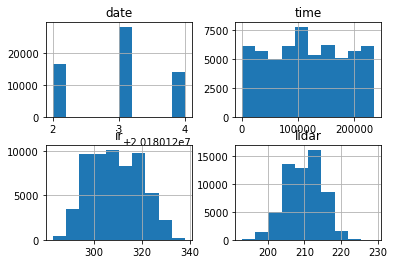

In [12]:
import matplotlib.pyplot as plt
data.hist()

<AxesSubplot:>

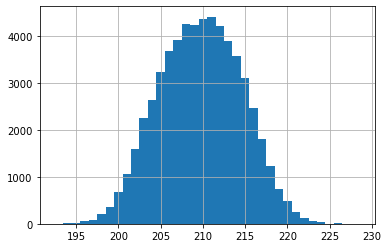

In [13]:
z_lid = data["lidar"]
z_lid .hist(bins = max(z_lid ) - min(z_lid ), align="left")

In [14]:
mean1 = sum(z_lid )/len(z_lid )
print(mean1)

209.73713297619855


In [15]:
mean2 = z_lid.mean()
print(mean2)

209.73713297619855


### variance

In [17]:
diff_sq = [(z - mean1)**2 for z in z_lid]
diff_sq

[18.172035262613814,
 1.5948331198051267,
 115.28602454857038,
 3.0176309769964393,
 5.120567167408023,
 5.120567167408023,
 27.69776931021671,
 68.2749714530254,
 3.0176309769964393,
 52.7492374054225,
 27.69776931021671,
 68.2749714530254,
 68.2749714530254,
 18.172035262613814,
 0.5433650245993352,
 1.5948331198051267,
 0.06909907220223097,
 27.69776931021671,
 5.120567167408023,
 85.8007055006283,
 105.32643954823119,
 18.172035262613814,
 1.5948331198051267,
 27.69776931021671,
 27.69776931021671,
 0.06909907220223097,
 52.7492374054225,
 27.69776931021671,
 10.646301215010919,
 1.5948331198051267,
 27.69776931021671,
 10.646301215010919,
 1.5948331198051267,
 68.2749714530254,
 52.7492374054225,
 0.5433650245993352,
 27.69776931021671,
 5.120567167408023,
 5.120567167408023,
 18.172035262613814,
 5.120567167408023,
 27.69776931021671,
 18.172035262613814,
 126.85217359583409,
 18.172035262613814,
 5.120567167408023,
 0.5433650245993352,
 5.120567167408023,
 18.172035262613814,
 5

In [18]:
var_sampling = sum(diff_sq)/len(z_lid)
var_sampling

23.407709770274106

In [19]:
var_unbiased = sum(diff_sq)/(len(z_lid)-1)
var_unbiased

23.40810659855441

In [20]:
var_sampling_pd = z_lid.var(ddof=False)
var_sampling_pd

23.4077097702742

In [21]:
var_unbiased_pd = z_lid.var()
var_unbiased_pd

23.408106598554504

In [22]:
import numpy as np
var_sampling_np = np.var(z_lid)
var_sampling_np

23.4077097702742

In [23]:
var_unbiased_np = np.var(z_lid, ddof=1)
var_unbiased_np

23.408106598554504

In [24]:
import math
stddev_sampling = math.sqrt(var_sampling)
stddev_sampling

4.838151482774605

In [25]:
stddev_unbiased = math.sqrt(var_unbiased)
stddev_unbiased

4.83819249292072

In [26]:
z_lid.std()

4.838192492920729

## 2.2.4 probability distribution

In [28]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [29]:
freqs["probs"] = freqs / len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [30]:
sum(freqs["probs"])

1.0

<AxesSubplot:>

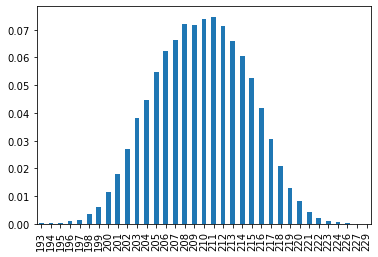

In [31]:
freqs["probs"].sort_index().plot.bar()

## 2.2.5 simulation

In [32]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0]

In [33]:
drawing()

202

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

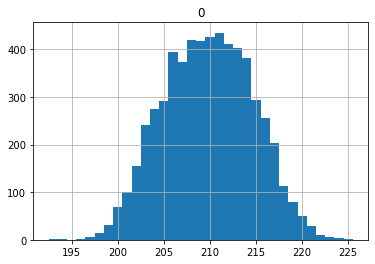

In [34]:
samples = [drawing() for i in range(len(data)//10)]
simulated = pd.DataFrame(samples)
simulated.hist(bins=max(simulated[0])-min(simulated[0]), align="left")

# 2.4 complicated distribution

## 2.4.1 conditional probability

In [54]:
data  = pd.read_csv("../sensor_data/sensor_data_600.txt", delimiter=" ",
                    header=None, names = ("date","time","ir","lidar"))

<AxesSubplot:>

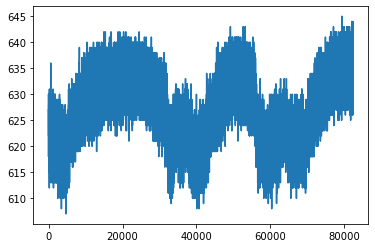

In [55]:
data.lidar.plot()

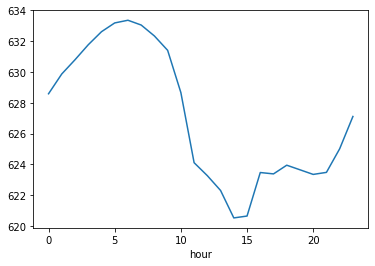

In [56]:
data["hour"] = [e//10000 for e in data.time]  ###hourly_mean###
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()

<AxesSubplot:>

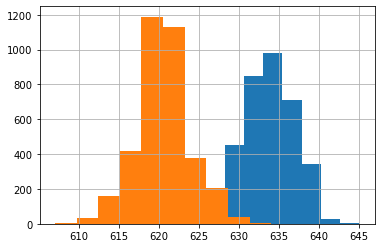

In [57]:
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()

## 2.4.2 joint probability

In [58]:
# create data frame for each hour
each_hour = {i:d.lidar.get_group(i).value_counts().sort_index() for i in range(24)}
each_hour

{0: 618      3
 619     18
 620     32
 621     46
 622     85
 623    132
 624    179
 625    252
 626    308
 627    316
 628    365
 629    361
 630    338
 631    342
 632    250
 633    213
 634    128
 636     71
 637     57
 638     30
 639     11
 640      1
 641      1
 642      1
 Name: lidar, dtype: int64,
 1: 619      4
 620      6
 621     13
 622     18
 623     44
 624     80
 625    150
 626    221
 627    267
 628    377
 629    422
 630    467
 631    396
 632    371
 633    254
 634    205
 636    121
 637     71
 638     25
 639     13
 640      5
 641      1
 642      1
 Name: lidar, dtype: int64,
 2: 619      1
 620      3
 621      3
 622      7
 623     19
 624     45
 625     75
 626    124
 627    171
 628    312
 629    426
 630    471
 631    470
 632    424
 633    369
 634    279
 636    172
 637     91
 638     42
 639     14
 640      8
 641      2
 642      1
 Name: lidar, dtype: int64,
 3: 620      1
 622      2
 623      3
 624     16
 625     38
 626

In [59]:
freqs = pd.concat(each_hour, axis=1)
freqs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,NaN,1.0,1.0,11.0,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,10.0,NaN,NaN,NaN,2.0,6.0,12.0,4.0,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,26.0,NaN,3.0,3.0,5.0,21.0,16.0,2.0,1.0
613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,53.0,2.0,15.0,5.0,18.0,56.0,36.0,9.0,2.0
615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107.0,86.0,2.0,17.0,22.0,31.0,81.0,84.0,39.0,4.0
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,161.0,149.0,18.0,49.0,49.0,84.0,142.0,115.0,49.0,7.0
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,256.0,241.0,42.0,104.0,76.0,135.0,182.0,189.0,84.0,12.0


In [60]:
freqs = freqs.fillna(0)
freqs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,0.0,1.0,1.0,11.0,0.0,0.0,0.0
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,10.0,0.0,0.0,0.0,2.0,6.0,12.0,4.0,0.0
612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,26.0,0.0,3.0,3.0,5.0,21.0,16.0,2.0,1.0
613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,53.0,2.0,15.0,5.0,18.0,56.0,36.0,9.0,2.0
615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,107.0,86.0,2.0,17.0,22.0,31.0,81.0,84.0,39.0,4.0
616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,161.0,149.0,18.0,49.0,49.0,84.0,142.0,115.0,49.0,7.0
617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,256.0,241.0,42.0,104.0,76.0,135.0,182.0,189.0,84.0,12.0


In [62]:
probs = freqs/len(data)
probs

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


### draw the distribution

<AxesSubplot:>

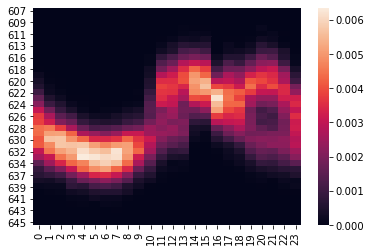

In [63]:
import seaborn as sns
sns.heatmap(probs)

/home/masahiro/software/anaconda3/envs/study/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


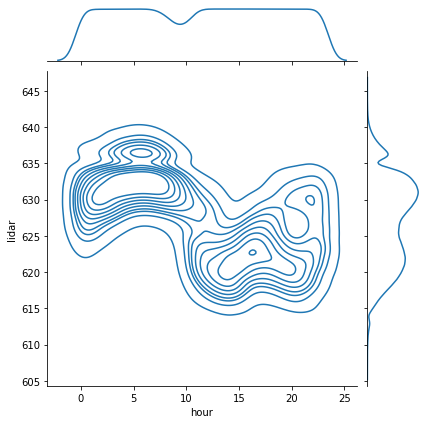

In [64]:
sns.jointplot(data["hour"], data["lidar"], data=data, kind = "kde") #kde: kernel density estimation(ref:https://seaborn.pydata.org/introduction.html)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,...,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


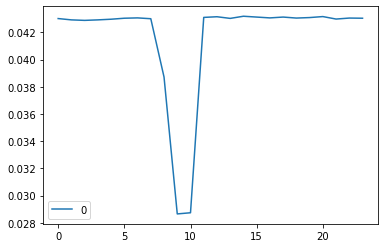

In [65]:
p_t = pd.DataFrame(probs.sum())
p_t.plot()
p_t.transpose()

In [66]:
p_t.sum()

0    1.0
dtype: float64

<AxesSubplot:>

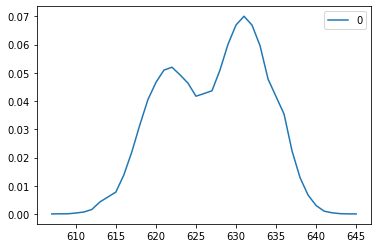

In [67]:
p_z = pd.DataFrame(probs.transpose().sum())
p_z.plot()

In [68]:
p_z.sum()

0    1.0
dtype: float64

In [69]:
p_t[0]

0     0.043013
1     0.042916
2     0.042879
3     0.042916
4     0.042964
5     0.043037
6     0.043061
7     0.043001
8     0.038712
9     0.028651
10    0.028736
11    0.043098
12    0.043146
13    0.043025
14    0.043183
15    0.043122
16    0.043061
17    0.043122
18    0.043049
19    0.043086
20    0.043159
21    0.042976
22    0.043049
23    0.043037
Name: 0, dtype: float64

In [70]:
cond_z_t = probs / p_t[0]
cond_z_t

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000283,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000282,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000844,0.001127,0.000000,0.000000,0.000282,0.000282,0.003097,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003376,0.002818,0.000000,0.000000,0.000000,0.000564,0.001689,0.003393,0.001129,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005065,0.007326,0.000000,0.000845,0.000847,0.001410,0.005912,0.004524,0.000564,0.000282
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014350,0.014934,0.000564,0.004227,0.001411,0.005076,0.015766,0.010178,0.002540,0.000565
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030107,0.024232,0.000564,0.004790,0.006209,0.008742,0.022804,0.023749,0.011008,0.001129
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.045301,0.041984,0.005079,0.013807,0.013830,0.023689,0.039977,0.032513,0.013830,0.001976
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072032,0.067906,0.011851,0.029304,0.021451,0.038071,0.051239,0.053435,0.023709,0.003388


<AxesSubplot:>

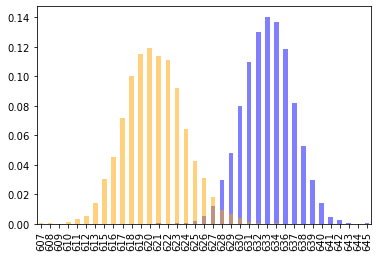

In [71]:
cond_z_t[6].plot.bar(color='blue', alpha=0.5)
cond_z_t[14].plot.bar(color='orange', alpha=0.5)

## 2.4.5 Bayes' theorem

In [72]:
# the probability p(z)=630 at t=13
cond_z_t[13][630]

0.036147980796385204

In [73]:
p_t[0][13]

0.043024993620976656

In [74]:
p_z.transpose()

,607,608,609,610,611,612,613,615,616,617,...,636,637,638,639,640,641,642,643,644,645
0,0.000012,0.000049,0.000061,0.000328,0.00068,0.00158,0.004241,0.007752,0.013852,0.022053,...,0.03537,0.02226,0.012819,0.006671,0.002989,0.000996,0.000401,0.000109,0.000024,0.000012


In [75]:
cond_t_z = probs.transpose() / p_z[0] # note: we need transpose() for extracting p(z).
cond_t_z

,607,608,609,610,611,612,613,615,616,617,...,636,637,638,639,640,641,642,643,644,645
0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024390,0.031114,0.028436,0.020036,0.004065,0.012195,0.030303,0.000000,0.0,0.0
1,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041566,0.038755,0.023697,0.023679,0.020325,0.012195,0.030303,0.000000,0.0,0.0
2,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.059086,0.049672,0.039810,0.025501,0.032520,0.024390,0.030303,0.000000,0.0,0.0
3,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.086568,0.084607,0.075829,0.118397,0.085366,0.085366,0.090909,0.000000,0.0,0.0
4,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.121264,0.113537,0.131754,0.103825,0.113821,0.109756,0.151515,0.222222,0.0,0.0
5,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.138097,0.152293,0.151659,0.178506,0.178862,0.256098,0.060606,0.000000,0.0,0.0
6,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.144624,0.158297,0.177251,0.193078,0.199187,0.195122,0.303030,0.222222,0.0,1.0
7,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.122638,0.139192,0.152607,0.160291,0.191057,0.195122,0.212121,0.444444,0.0,0.0
8,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096874,0.095524,0.109953,0.078324,0.117886,0.073171,0.060606,0.111111,1.0,0.0
9,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.048780,0.041485,0.037915,0.041894,0.020325,0.024390,0.000000,0.000000,0.0,0.0


In [76]:
(cond_t_z[630])[13]

0.023230490018148822

In [77]:
# bayes p(z=630 |t=13)
bayes = cond_t_z[630][13] * p_z[0][630] / p_t[0][13]
bayes

0.036147980796385204

In [78]:
bayes == cond_z_t[13][630]

True

In [79]:
# function to compute p(t|z1,z2,...) using bayes' rule.
def bayes_estimation(sensor_value, current_estimation):
    new_estimation = []
    for i in range(24):
        new_estimation.append(cond_z_t[i][sensor_value] * current_estimation[i]) # use current estimation instead of p(t).
        
    return new_estimation / sum(new_estimation)

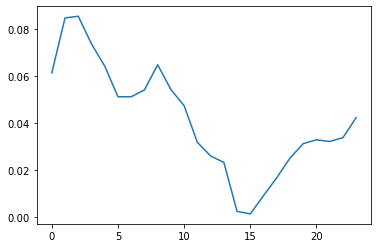

In [80]:
estimation = bayes_estimation(630, p_t[0])
plt.plot(estimation)

In [81]:
def t_from_multz(zs):
    estimation = p_t[0]
    for i in zs:
        estimation = bayes_estimation(i, estimation)
    return estimation        

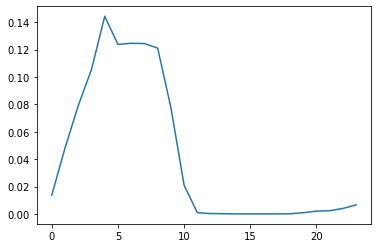

In [82]:
plt.plot(t_from_multz([630,632,636]))

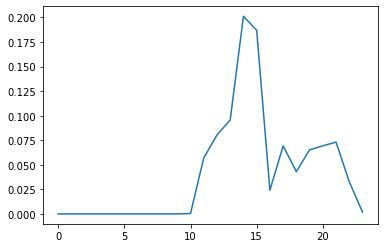

In [83]:
plt.plot(t_from_multz([617, 624, 619]))

# 2.5 multi-dimensional Gaussian distribution

## 2.5.1 2D Gaussian

In [85]:
data = pd.read_csv("../sensor_data/sensor_data_700.txt", delimiter=" ", names=["date","time","ir","lidar"])

In [90]:
d = data[(data['time']>=120000) & (data['time']<160000)] # extract 12 to 16 oclock.
d

,date,time,ir,lidar
3832,20180205,120000,17,726
3833,20180205,120003,14,730
3834,20180205,120006,14,724
3835,20180205,120010,21,724
3836,20180205,120013,26,725
...,...,...,...,...
65155,20180207,155946,8,729
65156,20180207,155949,25,730
65157,20180207,155952,10,731
65158,20180207,155955,15,735


In [93]:
d = d.loc[:,["ir","lidar"]] # extract only ir and lidar data
d

,ir,lidar
3832,17,726
3833,14,730
3834,14,724
3835,21,724
3836,26,725
...,...,...
65155,8,729
65156,25,730
65157,10,731
65158,15,735


/home/masahiro/software/anaconda3/envs/study/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


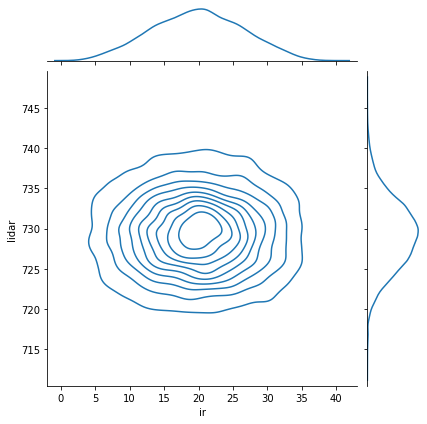

In [94]:
sns.jointplot(d['ir'], d['lidar'], d, kind='kde')

In [95]:
d.ir.var()

42.117126367701594

In [96]:
d.lidar.var()

17.702026469211457

In [97]:
d.mean()

ir        19.860247
lidar    729.311958
dtype: float64

In [98]:
sum((d.ir - d.ir.mean()) * (d.lidar - d.lidar.mean())) / (len(d) - 1)

-0.31677803385436953

In [99]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [100]:
from scipy.stats import multivariate_normal

In [101]:
irlidar = multivariate_normal(mean=d.mean().values, cov = d.cov().values)

<a list of 6 text.Text objects>

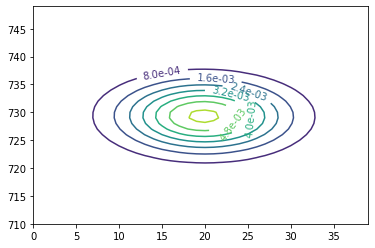

In [104]:
x,y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape + (2,))
pos[:,:,0] = x
pos[:,:,1] = y
cont = plt.contour(x,y,irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')